In [1]:
import pandas as pd 
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# Matplotlib plots are displayed directly in the Jupyter Notebook 
matplotlib.rcParams['figure.figsize'] = (5,6)

In [2]:
Data= pd.read_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\DMPA_CCEB_38_57_62\\cleaned_data_2.csv")
Data.sample (3)

,Product_ID,Plant_Code,Ship_ahead_day_count,Destination_Port,Carrier,Unit_quantity,Weight
9133,1690616,PLANT03,5,PORT09,V444_1,332,0.471350
1995,1688571,PLANT03,0,PORT09,V444_0,339,0.968988
9061,1689547,PLANT03,5,PORT09,V444_1,388,7.198627


In [3]:
Data.isnull().sum()

Product_ID              0
Plant_Code              0
Ship_ahead_day_count    0
Destination_Port        0
Carrier                 0
Unit_quantity           0
Weight                  0
dtype: int64

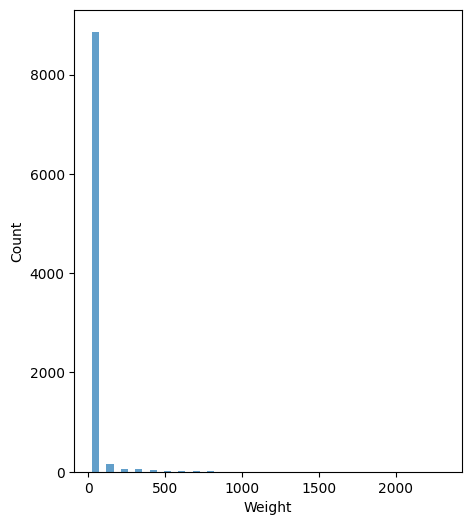

In [4]:
plt.hist(Data.Weight, bins=25, rwidth=0.5, alpha=0.7)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [5]:
Data.Weight.describe()

count    9215.000000
mean       19.871688
std        66.569064
min         0.000000
25%         1.407430
50%         4.440000
75%        13.325673
max      2338.405126
Name: Weight, dtype: float64

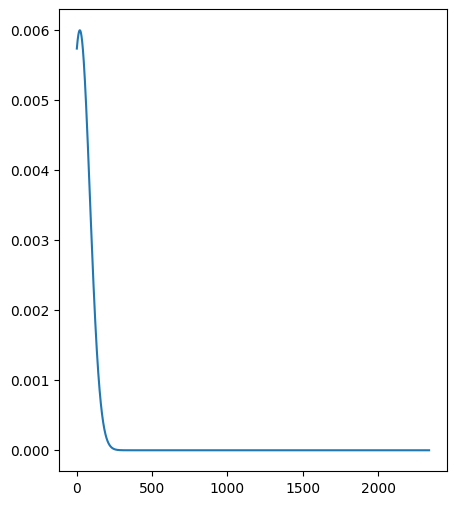

In [6]:
from scipy.stats import norm

rng = np.arange(Data.Weight.min(), Data.Weight.max(), 0.1) 
plt.plot(rng, norm.pdf(rng,Data.Weight.mean () ,Data.Weight.std()))

In [7]:
upper_limit = Data.Weight.mean () + 3*Data.Weight.std()
upper_limit

lower_limit = Data.Weight.mean () -3*Data.Weight.std()
lower_limit

Data[(Data.Weight>upper_limit) | (Data.Weight<lower_limit)]
Data.sample (3)


,Product_ID,Plant_Code,Ship_ahead_day_count,Destination_Port,Carrier,Unit_quantity,Weight
349,1699697,PLANT03,0,PORT09,V44_3,5296,3.307874
8645,1688285,PLANT03,5,PORT09,V444_1,277,0.781746
6433,1689547,PLANT03,5,PORT09,V444_0,545,21.595882


In [8]:
Data_no_outlier_std_dev = Data[(Data.Weight<upper_limit) & (Data.Weight>lower_limit)]
Data_no_outlier_std_dev.shape

(9054, 7)

In [9]:
print(Data.shape[0])
Data.shape[0] - Data_no_outlier_std_dev.shape[0]

9215


161

In [10]:
Data['zscore'] = (Data.Weight - Data.Weight.mean( ))/Data.Weight.std()
Data.head(3)


,Product_ID,Plant_Code,Ship_ahead_day_count,Destination_Port,Carrier,Unit_quantity,Weight,zscore
0,1700106,PLANT16,3,PORT09,V44_3,808,14.30,-0.083698
1,1700106,PLANT16,3,PORT09,V44_3,3188,87.94,1.022522
2,1700106,PLANT16,3,PORT09,V44_3,2331,61.20,0.620834


In [11]:
# valid
(14.30-19.871688)/66.569064

-0.08369785701057775

In [12]:
Data[Data['zscore']>3]

,Product_ID,Plant_Code,Ship_ahead_day_count,Destination_Port,Carrier,Unit_quantity,Weight,zscore
18,1697884,PLANT16,3,PORT09,V44_3,1404,227.200000,3.114484
21,1702652,PLANT16,3,PORT09,V44_3,2063,265.100000,3.683818
22,1699337,PLANT16,3,PORT09,V44_3,2114,267.100000,3.713862
23,1699337,PLANT16,3,PORT09,V44_3,2108,271.100000,3.773950
77,1697317,PLANT16,3,PORT09,V44_3,2716,457.160000,6.568942
...,...,...,...,...,...,...,...,...
6994,1652883,PLANT13,0,PORT09,V444_0,1033,301.784708,4.234895
6999,1652883,PLANT13,0,PORT09,V444_0,1190,349.210411,4.947324
7004,1652883,PLANT13,0,PORT09,V444_0,938,270.490446,3.764793
8032,1689548,PLANT03,0,PORT09,V444_1,4821,308.095519,4.329696


In [13]:
Data[Data['zscore']<-3]
# Data.sample (3)

,Product_ID,Plant_Code,Ship_ahead_day_count,Destination_Port,Carrier,Unit_quantity,Weight,zscore


In [14]:
Data_no_outliers = Data[(Data.zscore<3) & (Data.zscore>-3)]
Data_no_outliers.head()

,Product_ID,Plant_Code,Ship_ahead_day_count,Destination_Port,Carrier,Unit_quantity,Weight,zscore
0,1700106,PLANT16,3,PORT09,V44_3,808,14.30,-0.083698
1,1700106,PLANT16,3,PORT09,V44_3,3188,87.94,1.022522
2,1700106,PLANT16,3,PORT09,V44_3,2331,61.20,0.620834
3,1700106,PLANT16,3,PORT09,V44_3,847,16.16,-0.055757
4,1700106,PLANT16,3,PORT09,V44_3,2163,52.34,0.487739


In [15]:
Data_no_outliers = Data[(Data.zscore<3) & (Data.zscore>-3)]
outliers_removed=Data.shape[0] - Data_no_outliers.shape[0]
outliers_removed

161

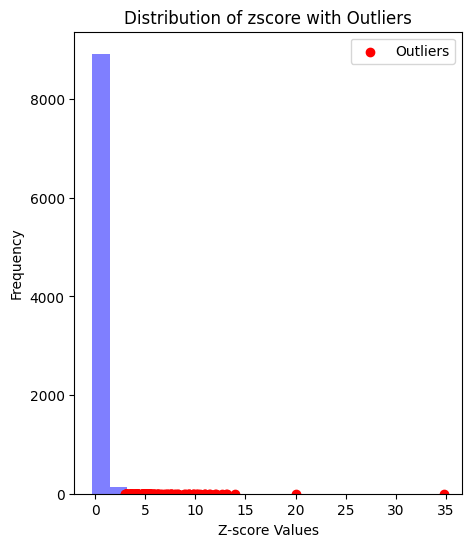

In [16]:
# Select the attribute you want to plot
attribute_to_plot = Data['zscore']

# Set a threshold for outliers (e.g., 3 standard deviations from the mean)
threshold = 3

# Plot a histogram of the selected attribute
plt.hist(attribute_to_plot, bins=20, color='blue', alpha=0.5)

# Highlight outliers above the threshold
outliers = attribute_to_plot[attribute_to_plot > threshold]
plt.scatter(outliers, [0] * len(outliers), color='red', marker='o', label='Outliers')

plt.title('Distribution of zscore with Outliers')
plt.xlabel('Z-score Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()